<a href="https://colab.research.google.com/github/Daham-abeyratne/Customer_Churn_Prediction/blob/main/costomer_churn_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir Customer_Churn_Prediction
%cd Customer_Churn_Prediction


mkdir: cannot create directory ‘Customer_Churn_Prediction’: File exists
/content/Customer_Churn_Prediction


In [4]:
!ls

In [5]:
!git init
!git config --global user.email "dahamabeyratney@gmail.com"
!git config --global user.name "Daham-Abeyratne"


Reinitialized existing Git repository in /content/Customer_Churn_Prediction/.git/


# **Import Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2


In [2]:
telco_data = pd.read_csv('/content/drive/MyDrive/ML_CW/Telco-Customer-Churn.csv')
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Exploratory Data Analysis(EDA)**

In [3]:
print("Rows: ", telco_data.shape[0])
print("Columns: ", telco_data.shape[1])

Rows:  7043
Columns:  21


In [4]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telco_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


the totalCharges should be numeric but it is in object format

In [6]:
print("Statistics")
telco_data.describe()

Statistics


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
print("Missing Values")
print(telco_data.isnull().sum())

Missing Values
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
print("Duplicate Values")
print(telco_data.duplicated().sum())

Duplicate Values
0


In [9]:
print("Target Variable")
print(telco_data['Churn'].value_counts())

print("\nPercentage of Target Variable:")
print((telco_data['Churn'].value_counts()/telco_data.shape[0]*100).round(2))

Target Variable
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage of Target Variable:
Churn
No     73.46
Yes    26.54
Name: count, dtype: float64


In [10]:
datacopy = telco_data.copy()

for col in datacopy:
    if datacopy[col].dtype == "object":
        datacopy[col] = datacopy[col].astype(str).str.strip()
datacopy.drop(columns=['customerID'],inplace=True)
datacopy.drop(columns=['TotalCharges'],inplace=True)
datacopy.drop(columns=['MonthlyCharges'],inplace=True)
datacopy.drop(columns=['tenure'],inplace=True)
# Show unique values
for col in datacopy:
    if col in datacopy:
        print(f"\nUnique values in {col}:")
        print(datacopy[col].value_counts())


Unique values in gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Unique values in SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Unique values in Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Unique values in Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Unique values in PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Unique values in MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Unique values in InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Unique values in OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Unique values in OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No

In [11]:
for col in telco_data:
  unkown =(telco_data[col] == ' ').sum()
  print(f"{col}: {unkown} unkown values")

customerID: 0 unkown values
gender: 0 unkown values
SeniorCitizen: 0 unkown values
Partner: 0 unkown values
Dependents: 0 unkown values
tenure: 0 unkown values
PhoneService: 0 unkown values
MultipleLines: 0 unkown values
InternetService: 0 unkown values
OnlineSecurity: 0 unkown values
OnlineBackup: 0 unkown values
DeviceProtection: 0 unkown values
TechSupport: 0 unkown values
StreamingTV: 0 unkown values
StreamingMovies: 0 unkown values
Contract: 0 unkown values
PaperlessBilling: 0 unkown values
PaymentMethod: 0 unkown values
MonthlyCharges: 0 unkown values
TotalCharges: 11 unkown values
Churn: 0 unkown values


# **Visualization**

In [12]:
eda_data = telco_data.copy()
eda_data['TotalCharges'] = pd.to_numeric(eda_data['TotalCharges'], errors='coerce')
eda_data['Churn'] = eda_data['Churn'].map({'No': 0, 'Yes': 1})

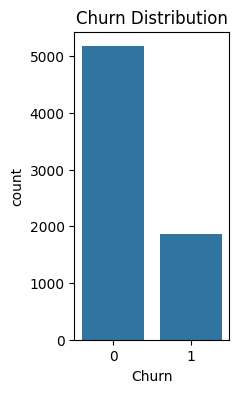

In [13]:
plt.figure(figsize=(2,4))
sns.countplot(data=eda_data, x='Churn')
plt.title('Churn Distribution')
plt.show()

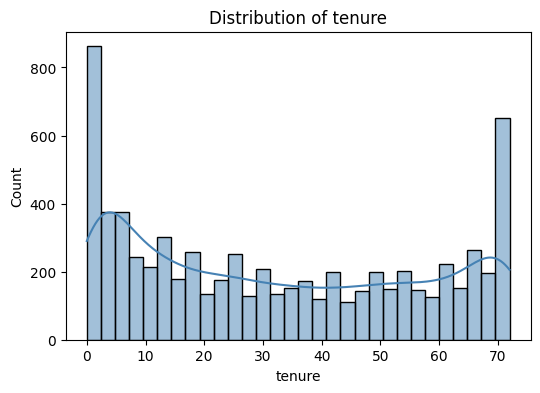

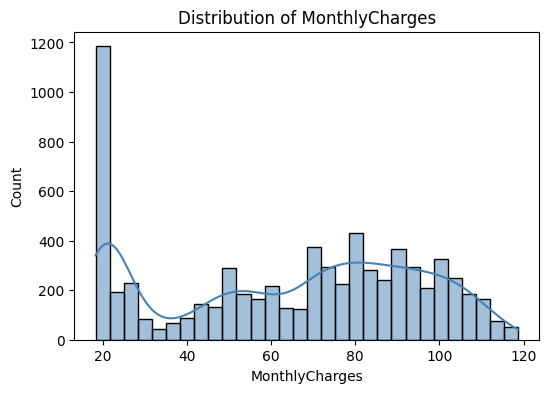

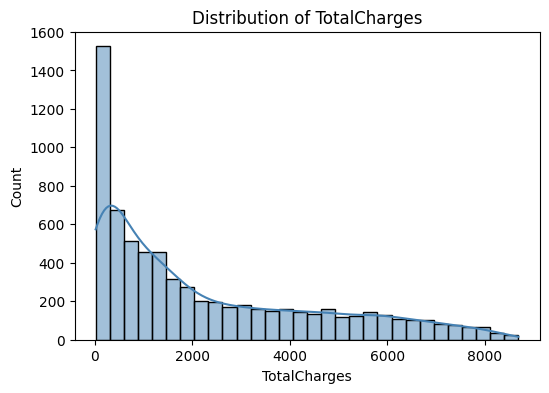

In [14]:
num_cols = ['tenure', 'MonthlyCharges','TotalCharges']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(eda_data[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.show()

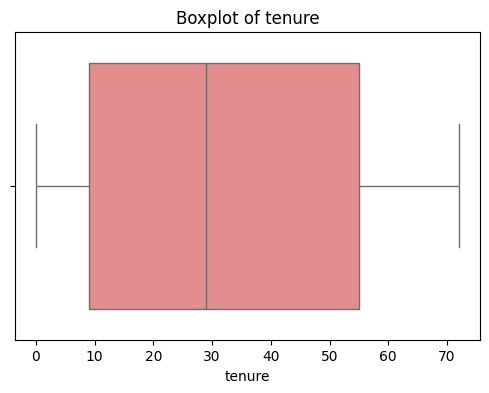

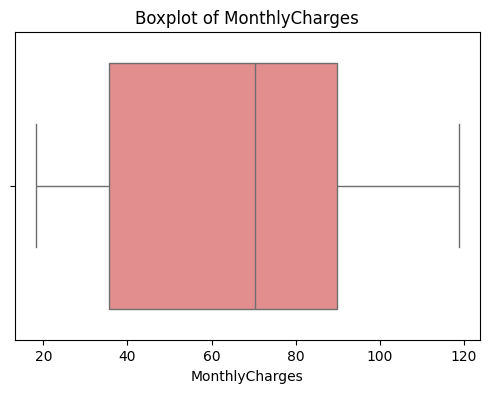

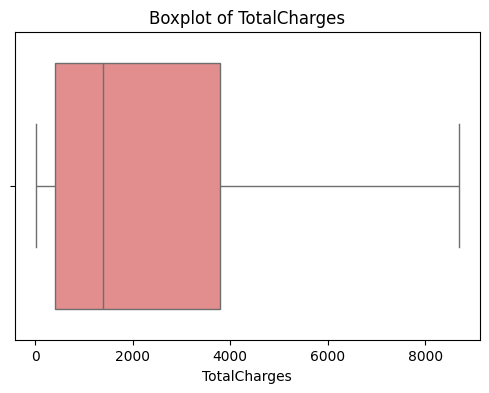

In [15]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=eda_data[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.show()

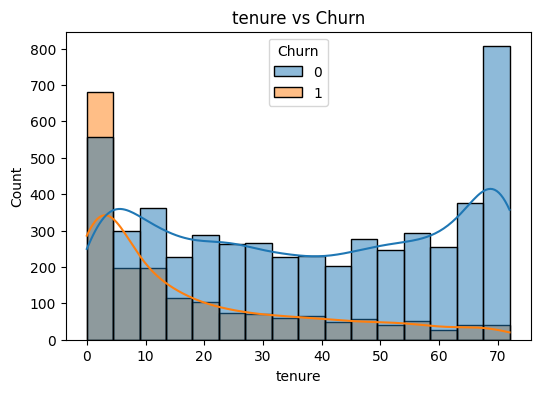

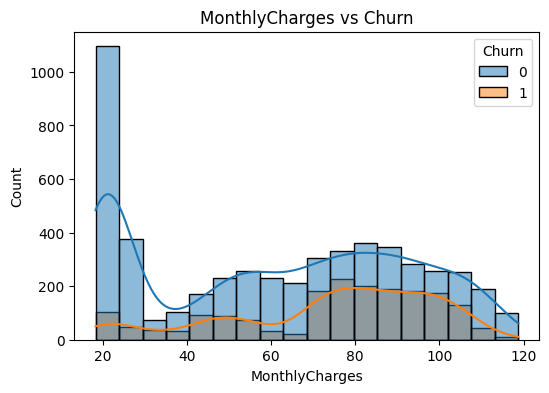

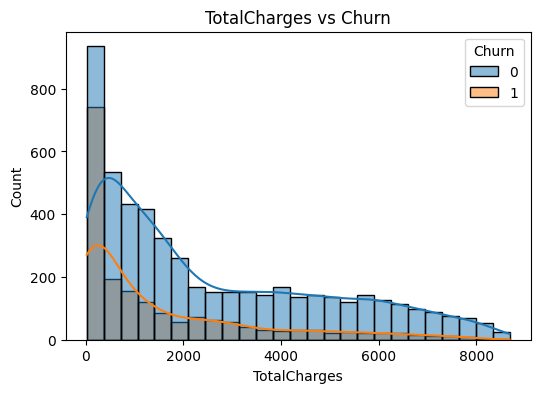

In [16]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=eda_data, x=col, hue='Churn', kde=True)
    plt.title(f"{col} vs Churn")
    plt.show()

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


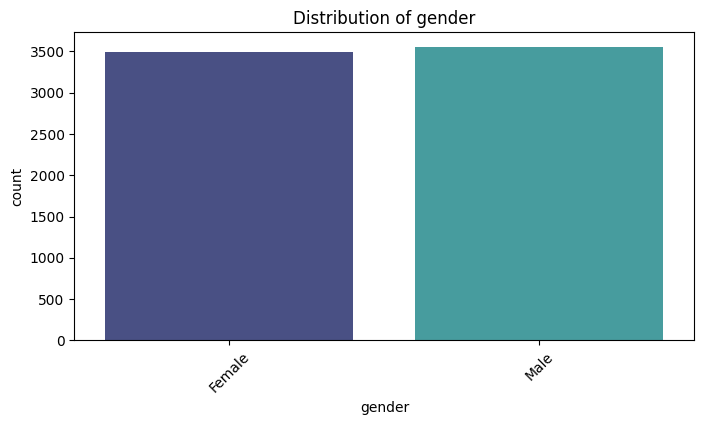

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


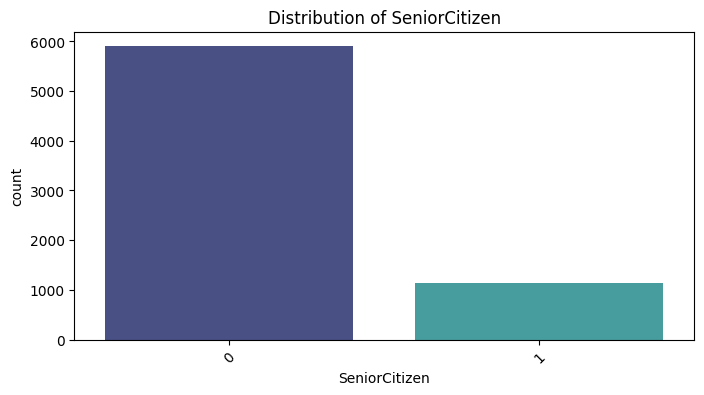

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


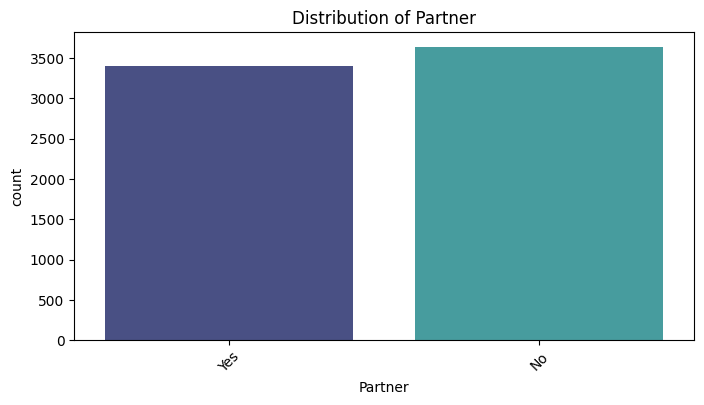

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


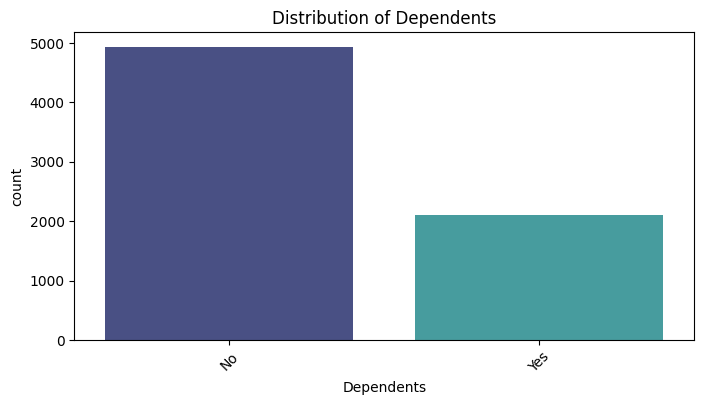

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


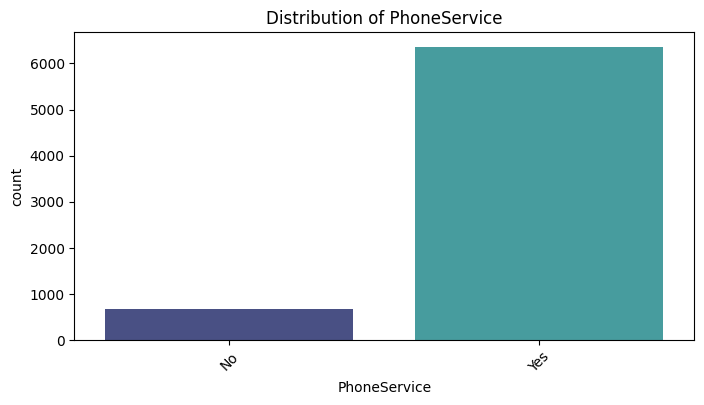

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


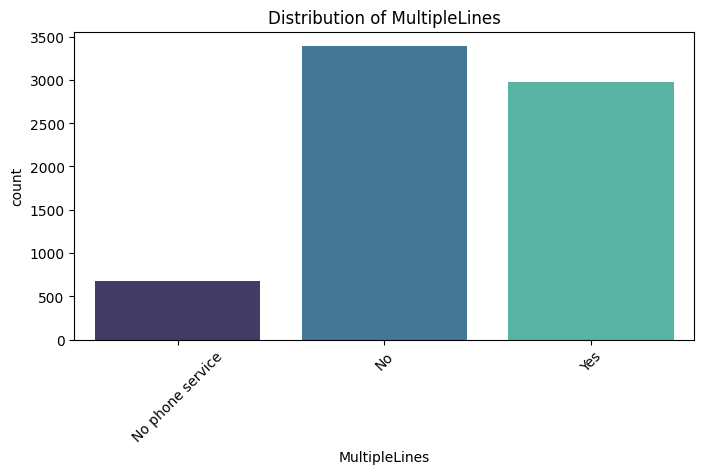

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


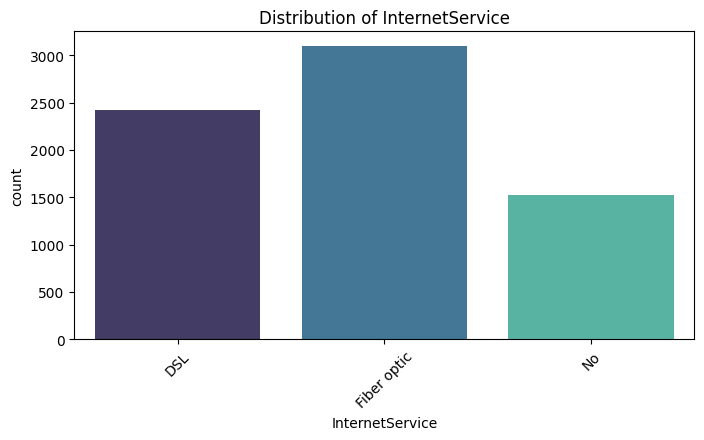

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


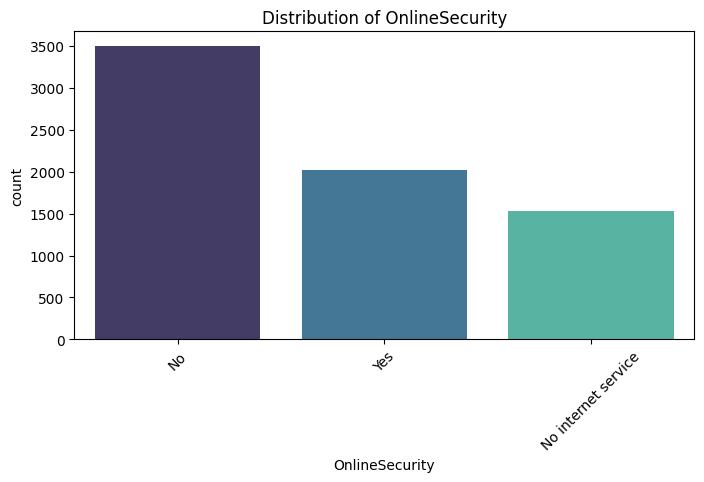

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


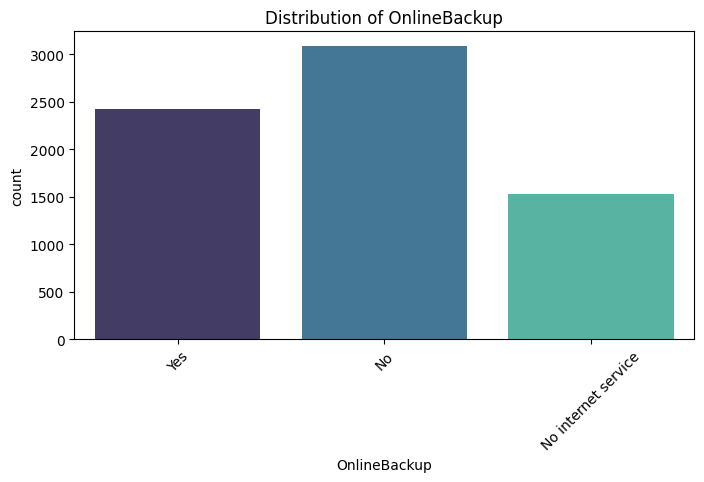

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


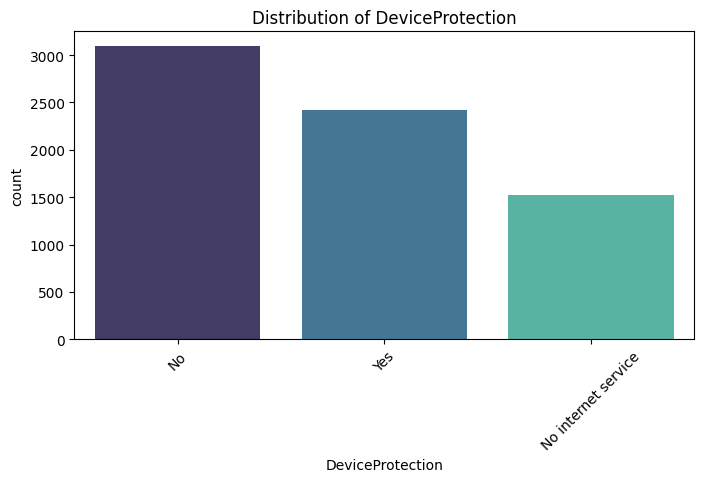

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


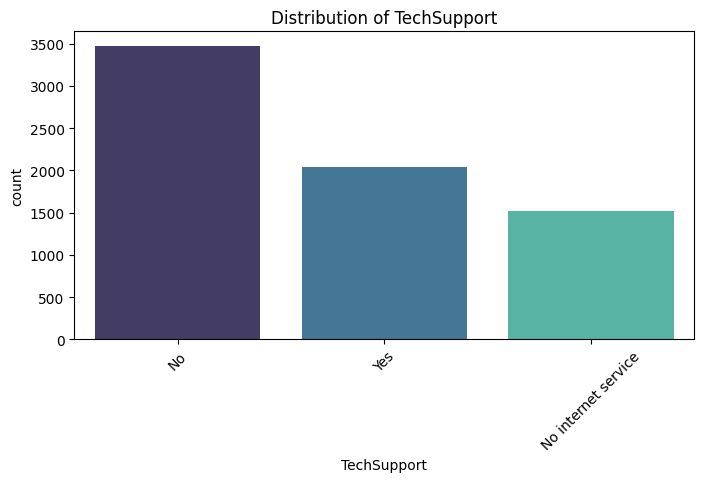

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


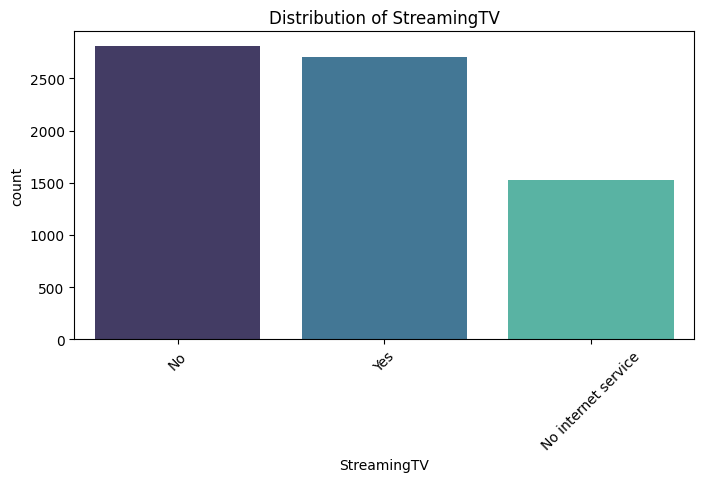

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


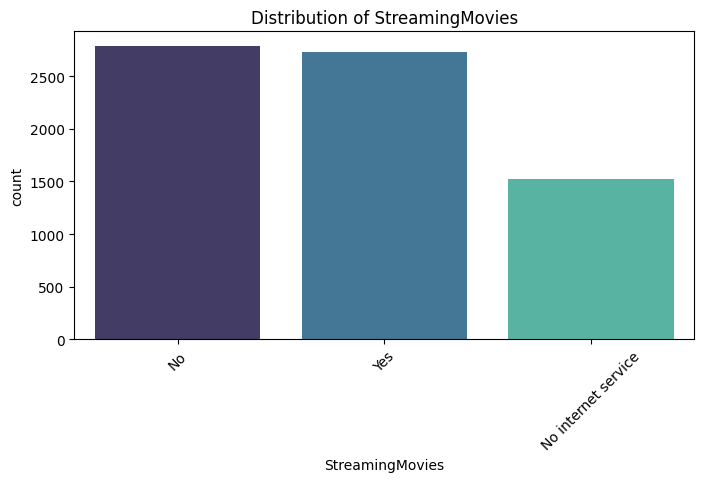

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


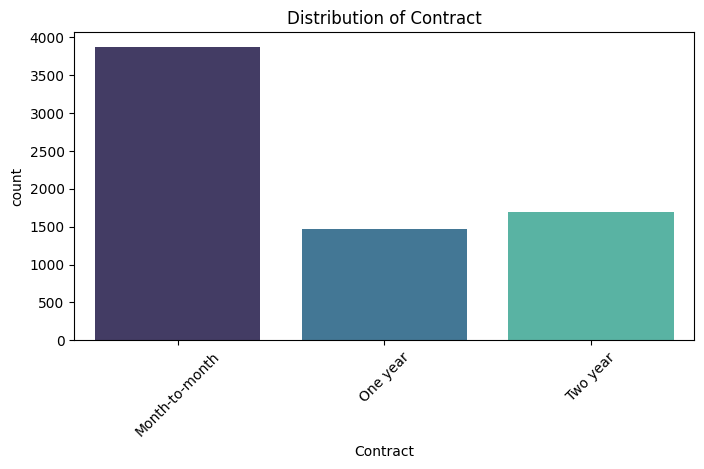

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


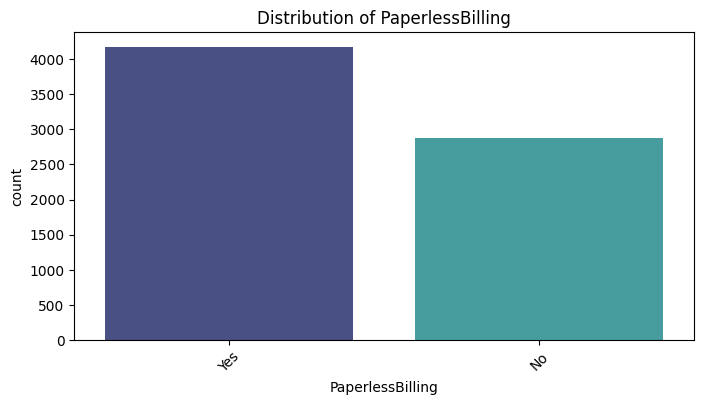

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


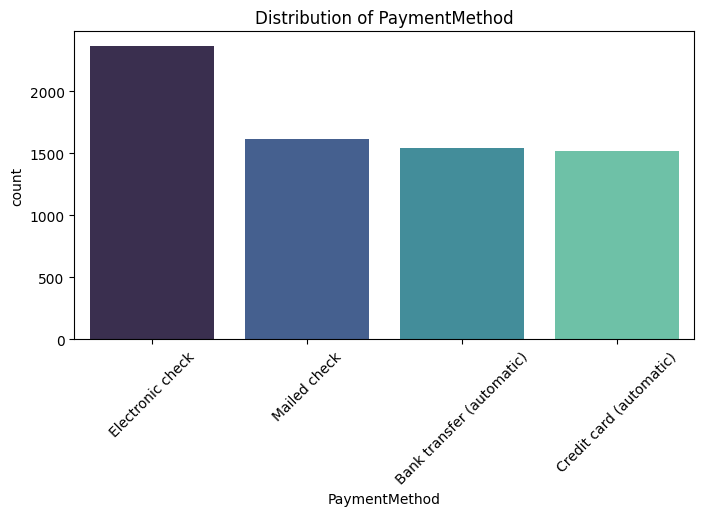

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


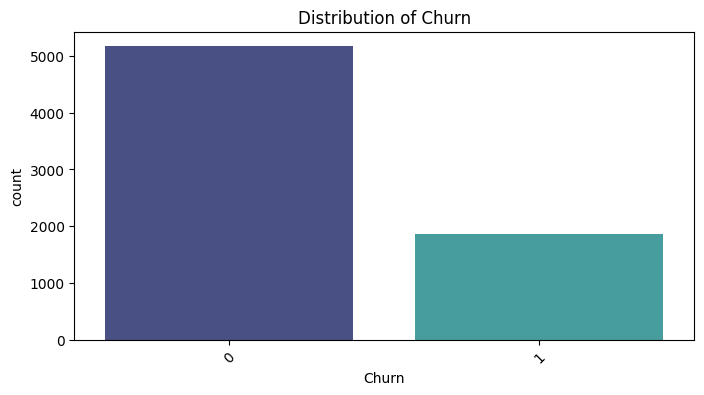

In [17]:
for col in datacopy:
    plt.figure(figsize=(8,4))
    sns.countplot(data=eda_data, x=col, palette='mako')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


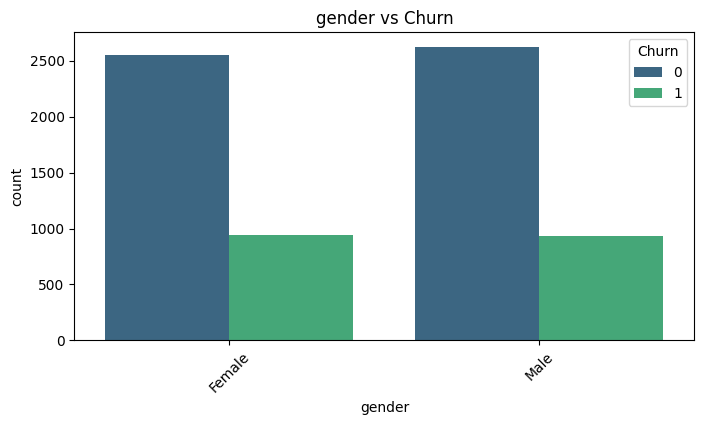

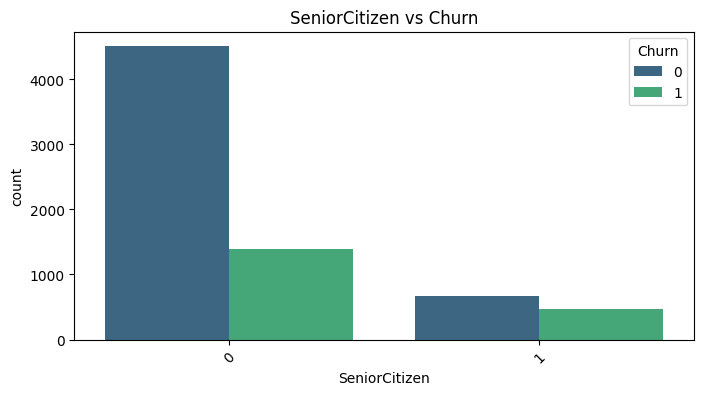

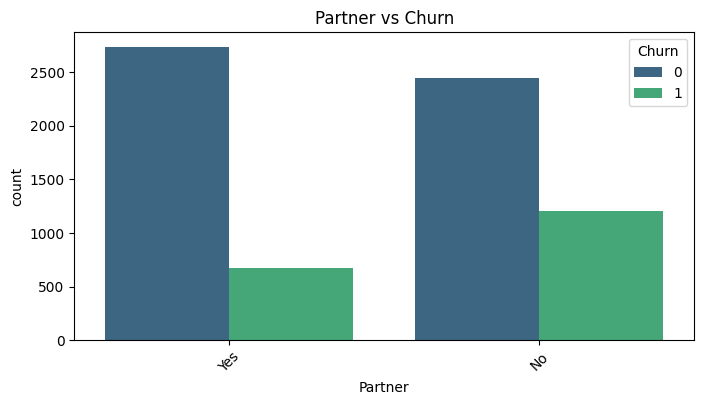

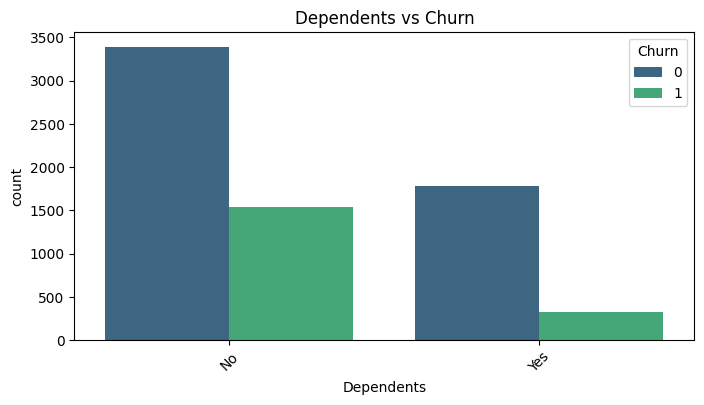

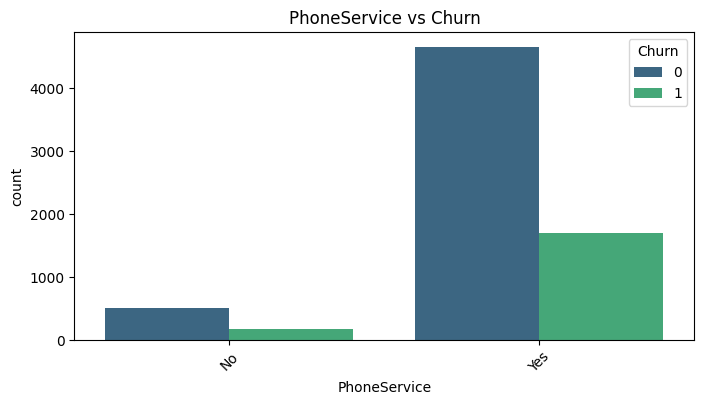

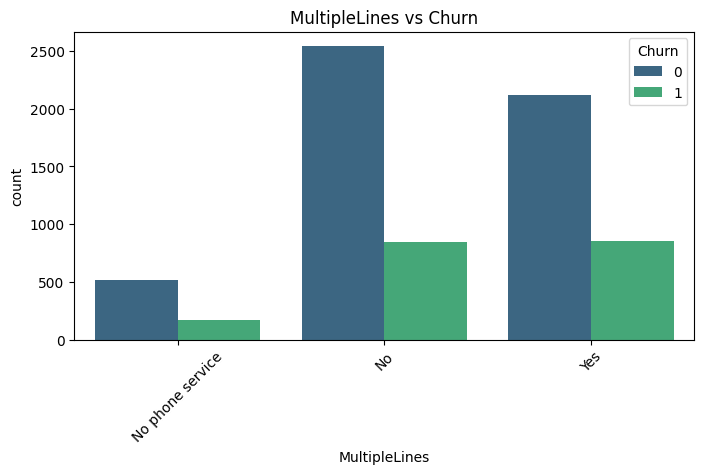

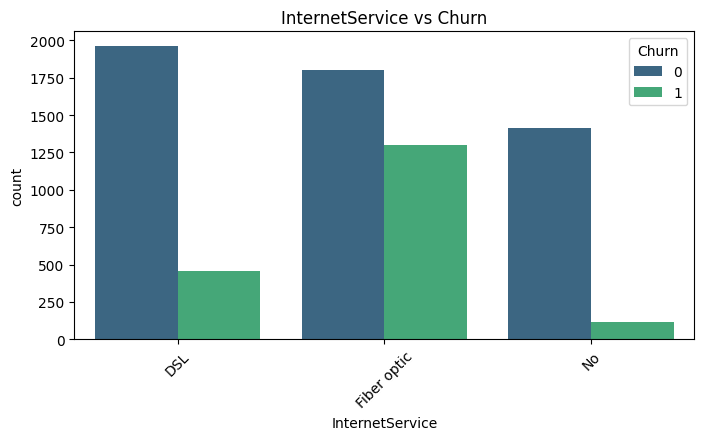

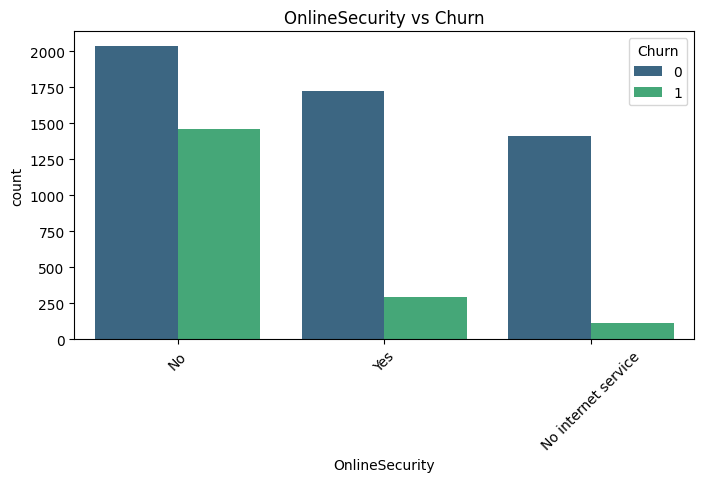

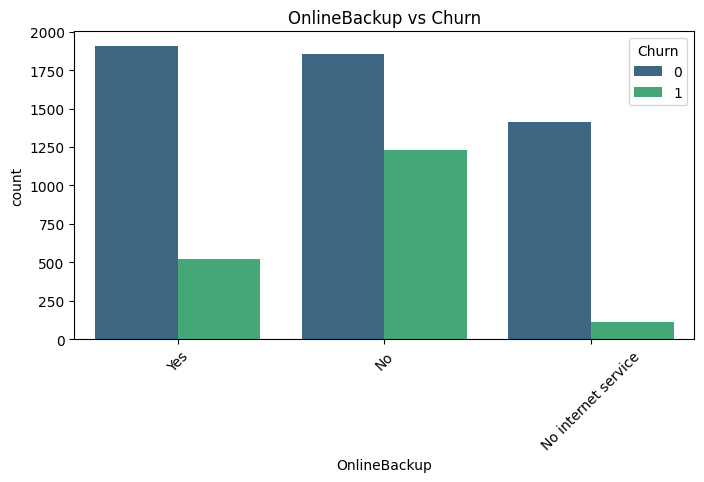

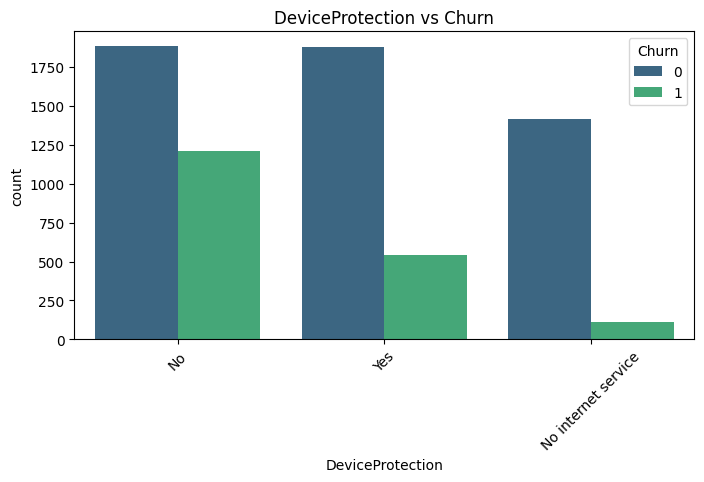

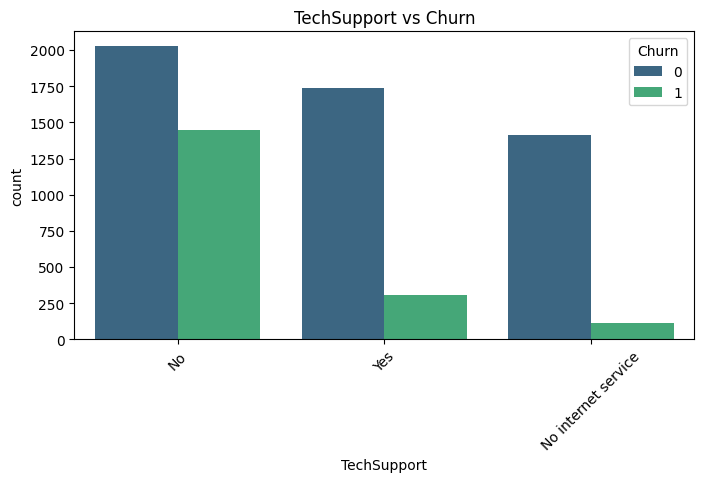

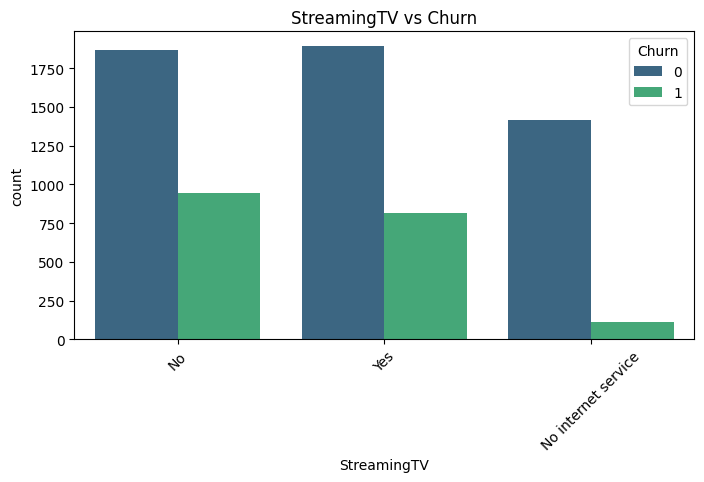

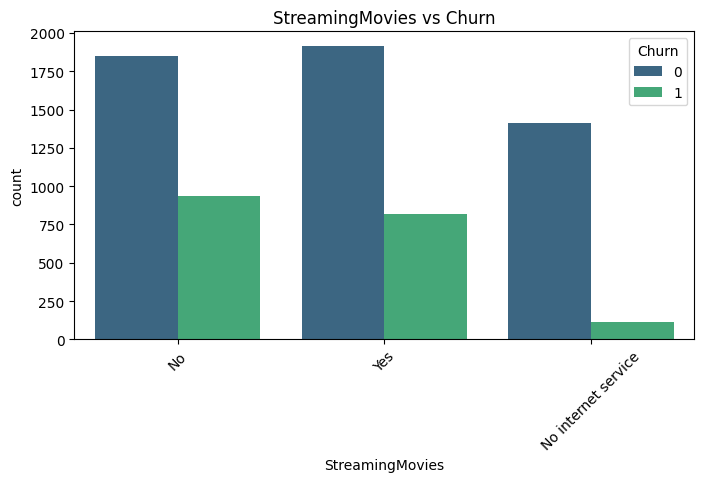

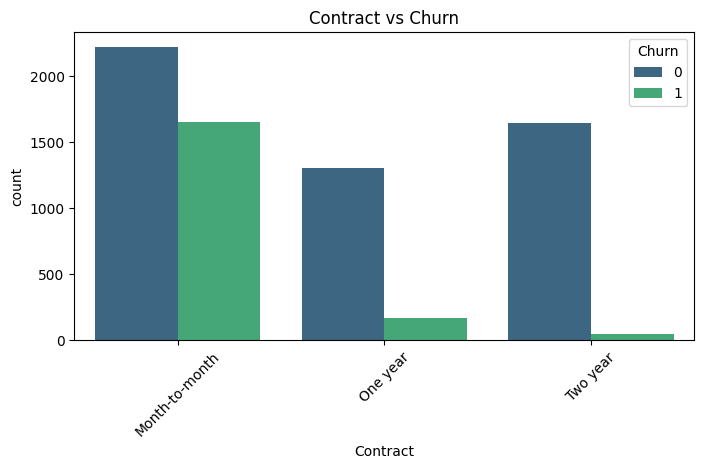

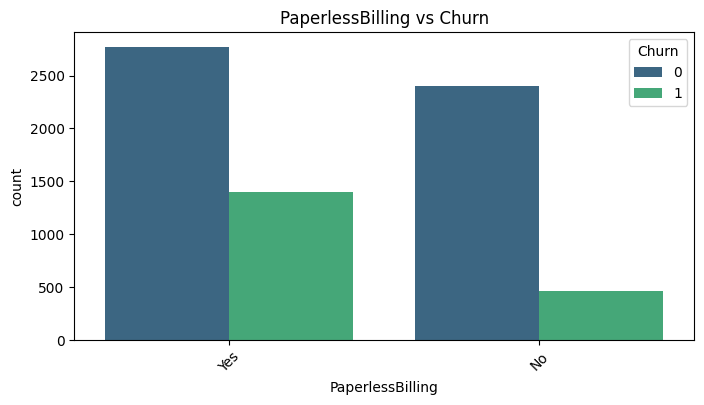

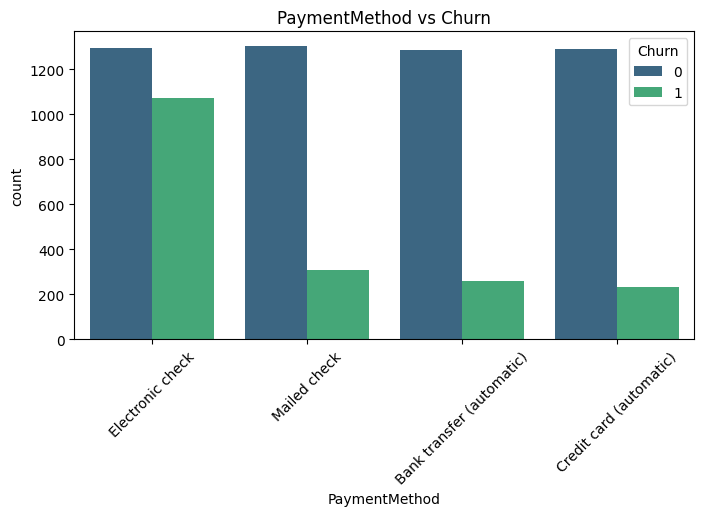

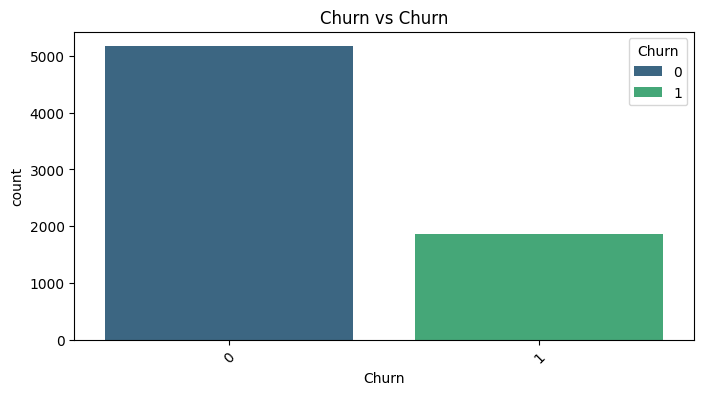

In [18]:
for col in datacopy:
    plt.figure(figsize=(8,4))
    sns.countplot(data=eda_data, x=col, hue='Churn', palette='viridis')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


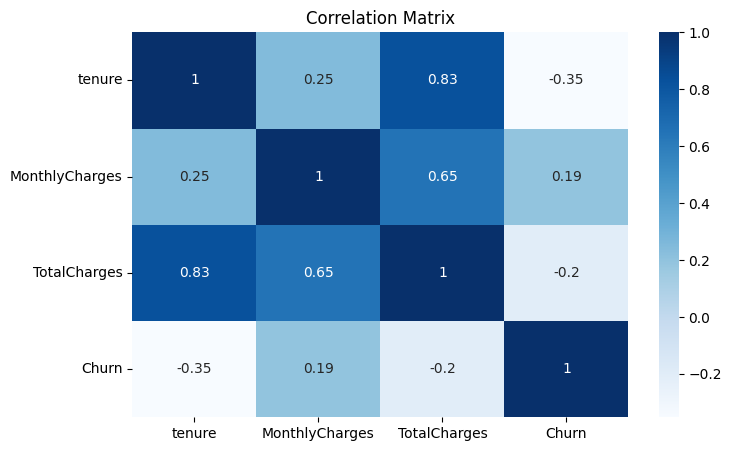

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(eda_data[num_cols + ['Churn']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


#**PreProcessing**

In [20]:
# Converting TotalCharges to numeric
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

# Checking missing values created by conversion
print("Missing TotalCharges after conversion:", telco_data['TotalCharges'].isna().sum())

# Droping rows with missing values
telco_data = telco_data.dropna().reset_index(drop=True)

#dataset shape after droping
print("Rows after droping ::" , telco_data.shape[0])


Missing TotalCharges after conversion: 11
Rows after droping :: 7032


In [21]:
#converting target variable to numeric in the main dataset
telco_data['Churn'] = telco_data['Churn'].map({'Yes': 1, 'No': 0})

In [22]:
telco_data = telco_data.drop(columns=['customerID'])

# **Feature engineering**

In [23]:
# Select categorical columns
cat_cols = telco_data.select_dtypes(include=['object']).columns

# One-hot encode
telco_data = pd.get_dummies(telco_data, columns=cat_cols, drop_first=True)


In [24]:
telco_data['TenureGroup'] = pd.cut(
    telco_data['tenure'],
    bins=[0, 12, 24, 48, 60, 100],
    labels=['0-12', '12-24', '24-48', '48-60', '60+']
)

In [25]:
service_yes_cols = [
    'PhoneService_Yes',
    'MultipleLines_Yes',
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes',
    'InternetService_Fiber optic'
]

telco_data['TotalServices'] = telco_data[service_yes_cols].sum(axis=1)


In [26]:
telco_data['HasFiber'] = telco_data['InternetService_Fiber optic']


In [27]:
telco_data['ContractRisk'] = (
    3 * (1 - telco_data['Contract_One year'] - telco_data['Contract_Two year']) +  # Month-to-month
    2 * telco_data['Contract_One year'] +                                          # One year
    1 * telco_data['Contract_Two year']                                            # Two year
)


In [28]:
telco_data['ChargeTenureInteraction'] = telco_data['MonthlyCharges'] * telco_data['tenure']

In [29]:
# Encode remaining object columns such as TenureGroup
cat_cols = telco_data.select_dtypes(include=['category']).columns

if len(cat_cols) > 0:
    telco_data = pd.get_dummies(telco_data, columns=cat_cols, drop_first=True)


In [30]:
telco_data.shape

(7032, 39)

In [31]:
X = telco_data.drop('Churn', axis=1)
y = telco_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5625, 38)
Test shape: (1407, 38)


In [32]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original X_train shape:", X_train.shape)
print("Original y_train shape:", y_train.shape)
print("Resampled X_train shape:", X_train_resampled.shape)
print("Resampled y_train shape:", y_train_resampled.shape)
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())

Original X_train shape: (5625, 38)
Original y_train shape: (5625,)
Resampled X_train shape: (8260, 38)
Resampled y_train shape: (8260,)

Class distribution after SMOTE:
Churn
0    4130
1    4130
Name: count, dtype: int64


In [59]:
# Initialize SelectKBest with mutual_info_classif and k=20
k_best_selector = SelectKBest(score_func=mutual_info_classif, k=20)

# Fit on the SMOTE-resampled training data and transform it
X_train_selected = k_best_selector.fit_transform(X_train_resampled, y_train_resampled)

# Transform the test data using the fitted selector
X_test_selected = k_best_selector.transform(X_test)

# Get the names of the selected features
selected_feature_indices = k_best_selector.get_support(indices=True)
selected_features = X_train_resampled.columns[selected_feature_indices]

print("Original X_train_resampled shape:", X_train_resampled.shape)
print("Selected X_train shape:", X_train_selected.shape)
print("Original X_test shape:", X_test.shape)
print("Selected X_test shape:", X_test_selected.shape)

print("\nTop 20 Selected Features:")
for feature in selected_features:
    print(feature)

Original X_train_resampled shape: (8260, 38)
Selected X_train shape: (8260, 20)
Original X_test shape: (1407, 38)
Selected X_test shape: (1407, 20)

Top 20 Selected Features:
tenure
MonthlyCharges
TotalCharges
MultipleLines_Yes
InternetService_Fiber optic
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
Contract_Two year
PaperlessBilling_Yes
PaymentMethod_Electronic check
TotalServices
HasFiber
ContractRisk
ChargeTenureInteraction
TenureGroup_60+


# **Decision Tree Model**

base model

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

Fitting 5 folds for each of 192 candidates, totalling 960 fits
=== BEST PARAMETERS FOUND BY GRID SEARCH (DT + SMOTE + Selected Features) ===
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 50}

Best Precision-score from CV (DT + SMOTE + Selected Features): 0.8025896729851725

=== TUNED DECISION TREE CLASSIFICATION REPORT (SMOTE + Selected Features) ===
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.64      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.77      0.76      0.76      1407



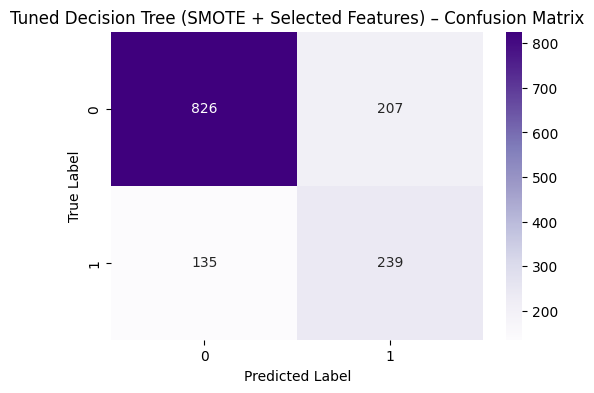

In [96]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10]
}

dt_model_smote_selected = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'
)

dt_model_smote_selected.fit(X_train_resampled, y_train_resampled)

grid_search_smote_selected = GridSearchCV(
    estimator=dt_model_smote_selected,
    param_grid=param_grid,
    scoring='precision',  # Focus on precision for churn
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_smote_selected.fit(X_train_selected, y_train_resampled)

print("=== BEST PARAMETERS FOUND BY GRID SEARCH (DT + SMOTE + Selected Features) ===")
print(grid_search_smote_selected.best_params_)

print("\nBest Precision-score from CV (DT + SMOTE + Selected Features):", grid_search_smote_selected.best_score_)

best_dt_selected = grid_search_smote_selected.best_estimator_
y_pred_dt_selected = best_dt_selected.predict(X_test_selected)

print("\n=== TUNED DECISION TREE CLASSIFICATION REPORT (SMOTE + Selected Features) ===")
print(classification_report(y_test, y_pred_dt_selected))

plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_dt_selected),
    annot=True,
    fmt="d",
    cmap="Purples"
)
plt.title("Tuned Decision Tree (SMOTE + Selected Features) – Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

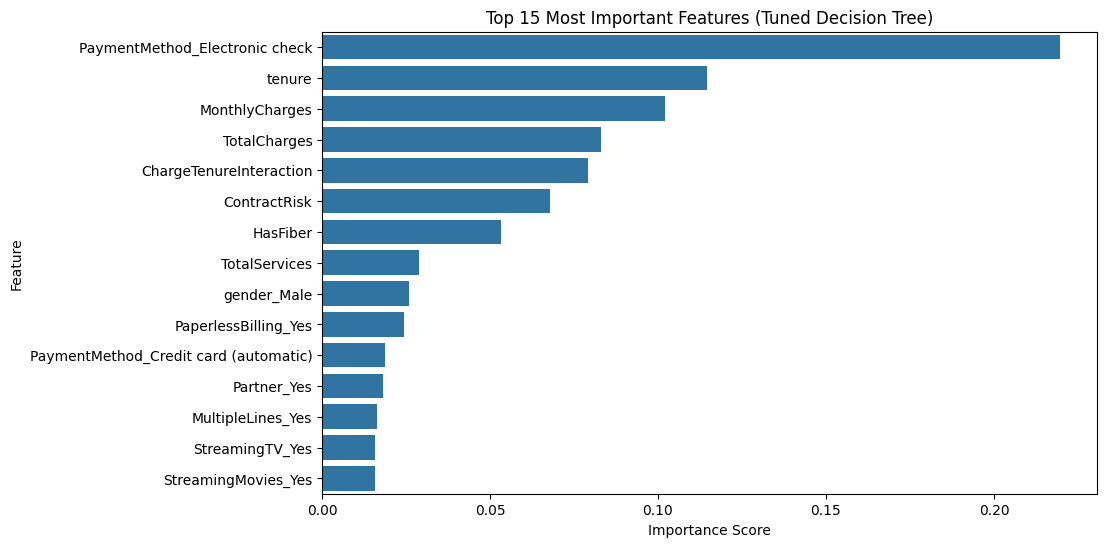

In [43]:
# Extract feature importances
importances = dt_model_smote_selected.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train_selected.columns

plt.figure(figsize=(10,6))
sns.barplot(
    x=importances[indices][:15],
    y=feature_names[indices][:15]
)
plt.title("Top 15 Most Important Features (Tuned Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# **Neural Network**

In [44]:
# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# sklearn utilities
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [93]:
# Compute class weights from y_train
cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: cw[0], 1: cw[1]}
class_weights

{0: np.float64(0.6809927360774818), 1: np.float64(1.8812709030100334)}

In [94]:
checkpoint_path = "best_nn_model.h5"
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
mc = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)


In [95]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-5,
    verbose=1
)

In [87]:
y_proba = model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
best_threshold = thresholds[np.argmax(tpr - fpr)]
print("Best Threshold:", best_threshold)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best Threshold: 0.42565084


In [90]:
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)

# Recompute class weights for the resampled data (should be balanced after SMOTE, so weights are 1.0) and use the new scaler
cw_smote_selected = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_resampled),
    y=y_train_resampled
)
class_weights_smote_selected = {0: cw_smote_selected[0], 1: cw_smote_selected[1]}

print("Class weights after SMOTE (Selected Features):", class_weights_smote_selected)

# Rebuild the Neural Network model with the new input dimension
input_dim_selected = X_train_selected_scaled.shape[1]

def build_model_selected(input_dim_sel):
    model = Sequential([
        tf.keras.Input(shape=(input_dim_sel,)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.15),

        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.10),

        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model_smote_selected = build_model_selected(input_dim_selected)
model_smote_selected.summary()

# Train the new Neural Network model with SMOTE data and selected features
print("\n--- Training Neural Network with SMOTE data and Selected Features ---")
history_smote_selected = model_smote_selected.fit(
    X_train_selected_scaled, y_train_resampled,
    validation_split=0.20,
    epochs=80,
    batch_size=64,
    class_weight=class_weights_smote_selected,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)


Class weights after SMOTE (Selected Features): {0: np.float64(1.0), 1: np.float64(1.0)}


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,193 (16.38 KB)

 Non-trainable params: 224 (896.00 B)


--- Training Neural Network with SMOTE data and Selected Features ---
Epoch 1/80
104/104 - 6s - 57ms/step - accuracy: 0.7391 - loss: 0.6287 - val_accuracy: 0.4879 - val_loss: 0.8342 - learning_rate: 1.0000e-03
Epoch 2/80
104/104 - 1s - 5ms/step - accuracy: 0.7694 - loss: 0.5697 - val_accuracy: 0.6477 - val_loss: 0.7562 - learning_rate: 1.0000e-03
Epoch 3/80
104/104 - 0s - 4ms/step - accuracy: 0.7775 - loss: 0.5512 - val_accuracy: 0.7222 - val_loss: 0.6574 - learning_rate: 1.0000e-03
Epoch 4/80
104/104 - 0s - 4ms/step - accuracy: 0.7859 - loss: 0.5454 - val_accuracy: 0.7536 - val_loss: 0.6310 - learning_rate: 1.0000e-03
Epoch 5/80
104/104 - 0s - 4ms/step - accuracy: 0.7883 - loss: 0.5321 - val_accuracy: 0.7772 - val_loss: 0.5620 - learning_rate: 1.0000e-03
Epoch 6/80
104/104 - 0s - 4ms/step - accuracy: 0.7862 - loss: 0.5296 - val_accuracy: 0.7881 - val_loss: 0.5681 - learning_rate: 1.0000e-03
Epoch 7/80
104/104 - 0s - 4ms/step - accuracy: 0.7821 - loss: 0.5249 - val_accuracy: 0.7875 - 

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Optimal threshold for >= 60% precision (max F1) with SMOTE + Selected Features: 0.5249
Precision at this threshold: 0.6170
Recall at this threshold: 0.6203
F1-score at this threshold: 0.6187

=== CLASSIFICATION REPORT WITH BALANCED THRESHOLD ===
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1033
           1       0.62      0.62      0.62       374

    accuracy                           0.80      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.80      0.80      0.80      1407



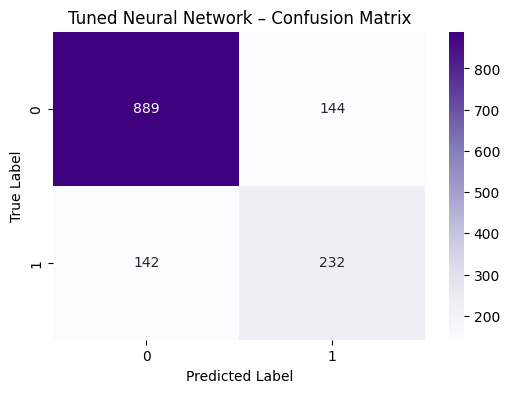

In [89]:

# Predict probabilities on the original X_test_selected_scaled data
y_proba_nn_smote_selected = model_smote_selected.predict(X_test_selected_scaled).ravel()

# Recalculate precision, recall, and thresholds for the new model
precision_nn_selected, recall_nn_selected, thresholds_nn_selected = precision_recall_curve(y_test, y_proba_nn_smote_selected)

target_precision_nn = 0.60 # Re-define for clarity, though already defined
best_threshold_for_balanced_smote_selected = None
best_f1_for_balanced_smote_selected = -1.0
best_precision_for_balanced_smote_selected = 0.0
best_recall_for_balanced_smote_selected = 0.0

# Find the optimal threshold for >= 60% precision while maximizing F1-score
for i in range(len(thresholds_nn_selected)):
    current_precision = precision_nn_selected[i]
    current_recall = recall_nn_selected[i]
    current_threshold = thresholds_nn_selected[i]

    current_f1 = 0.0
    if (current_precision + current_recall) > 0:
        current_f1 = 2 * (current_precision * current_recall) / (current_precision + current_recall)

    if current_precision >= target_precision_nn:
        if current_f1 > best_f1_for_balanced_smote_selected:
            best_f1_for_balanced_smote_selected = current_f1
            best_threshold_for_balanced_smote_selected = current_threshold
            best_precision_for_balanced_smote_selected = current_precision
            best_recall_for_balanced_smote_selected = current_recall

if best_threshold_for_balanced_smote_selected is None:
    print(f"Could not find a threshold that achieves at least {target_precision_nn*100:.0f}% precision for class 1.")
else:
    print(f"\nOptimal threshold for >= {target_precision_nn*100:.0f}% precision (max F1) with SMOTE + Selected Features: {best_threshold_for_balanced_smote_selected:.4f}")
    print(f"Precision at this threshold: {best_precision_for_balanced_smote_selected:.4f}")
    print(f"Recall at this threshold: {best_recall_for_balanced_smote_selected:.4f}")
    print(f"F1-score at this threshold: {best_f1_for_balanced_smote_selected:.4f}")

    y_pred_balanced_nn_smote_selected = (y_proba_nn_smote_selected >= best_threshold_for_balanced_smote_selected).astype(int)

    print("\n=== CLASSIFICATION REPORT WITH BALANCED THRESHOLD ===")
    print(classification_report(y_test, y_pred_balanced_nn_smote_selected))

    cm_balanced_nn_smote_selected = confusion_matrix(y_test, y_pred_balanced_nn_smote_selected)
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm_balanced_nn_smote_selected,
        annot=True,
        fmt="d",
        cmap="Purples"
    )
    plt.title("Tuned Neural Network – Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

## Model Comparison


In [86]:
models_to_compare = [
    'DT Tuned (SMOTE + Selected Features)',
    'NN Tuned (SMOTE + Selected Features + Balanced Threshold)'
]

comparison_df_focused = comparison_df[comparison_df['Model'].isin(models_to_compare)].reset_index(drop=True)

print("\n=== Focused Model Comparison ===")
display(comparison_df_focused.round(4))


=== Focused Model Comparison ===


,Model,Precision (Class 1),Recall (Class 1),F1-Score (Class 1),AUC Score
0,DT Tuned (SMOTE + Selected Features),0.5359,0.6390,0.5829,0.7951
1,NN Tuned (SMOTE + Selected Features + Balanced...,0.6162,0.6096,0.6129,0.8322


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


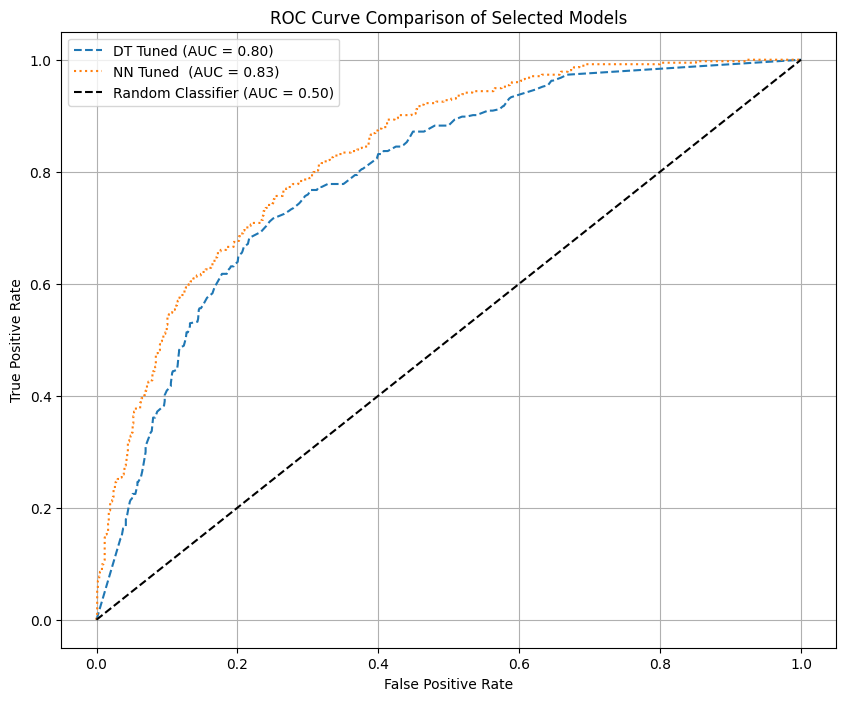

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# --- DT Tuned  ---
y_proba_dt_selected = best_dt_selected.predict_proba(X_test_selected)[:, 1]
fpr_dt_selected, tpr_dt_selected, _ = roc_curve(y_test, y_proba_dt_selected)
auc_dt_selected = auc(fpr_dt_selected, tpr_dt_selected)
plt.plot(fpr_dt_selected, tpr_dt_selected, label=f'DT Tuned (AUC = {auc_dt_selected:.2f})', linestyle='--')


# --- NN Tuned ---
y_proba_nn_smote_selected = model_smote_selected.predict(X_test_selected_scaled).ravel()
fpr_nn_smote_selected, tpr_nn_smote_selected, _ = roc_curve(y_test, y_proba_nn_smote_selected)
auc_nn_smote_selected = auc(fpr_nn_smote_selected, tpr_nn_smote_selected)
plt.plot(fpr_nn_smote_selected, tpr_nn_smote_selected, label=f'NN Tuned  (AUC = {auc_nn_smote_selected:.2f})', linestyle=':')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Selected Models')
plt.legend()
plt.grid(True)
plt.show()